In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
x,y = sklearn.datasets.make_moons(200, noise = 0.2)

x

plt.scatter(x[:,0], x[:,1], s=40, c = y, cmap = plt.cm.Spectral)
plt.show()

In [9]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [12]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super().__init__()
        self.hidden = nn.Linear(input_neurons,hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [13]:
network = FeedForward(2, 50, 2)
optimizer = torch.optim.SGD(network.parameters(), lr= 0.02)
loss_function = nn.CrossEntropyLoss()

Current epoch: 999


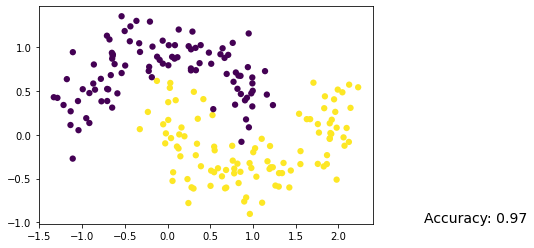

Current epoch: 1999


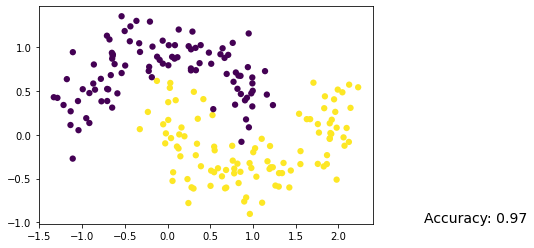

Current epoch: 2999


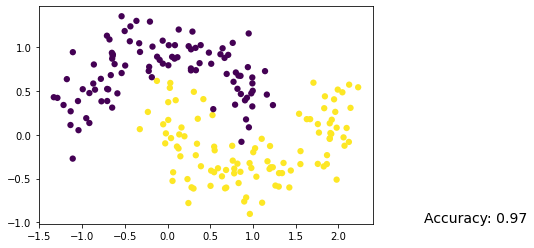

Current epoch: 3999


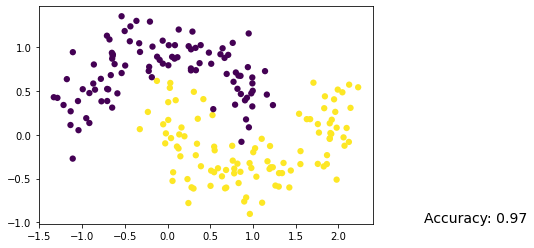

Current epoch: 4999


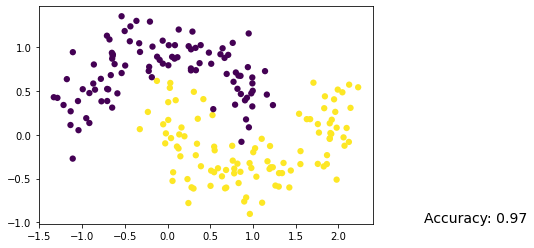

Current epoch: 5999


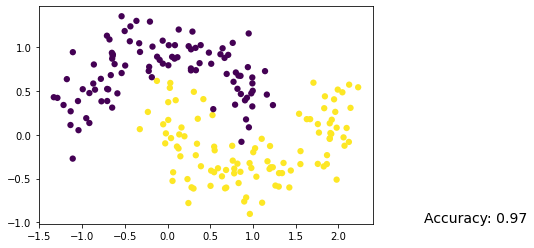

Current epoch: 6999


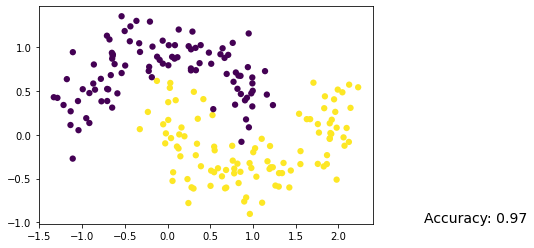

Current epoch: 7999


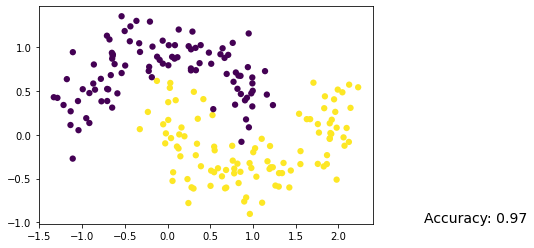

Current epoch: 8999


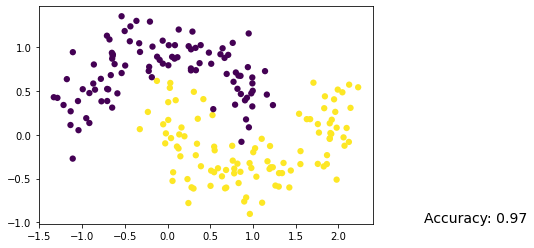

Current epoch: 9999


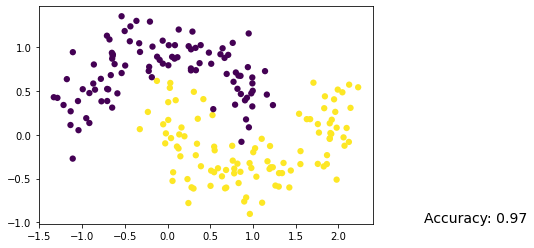

In [16]:
for epoch in range(10000):
    out = network(x) #zamiast network.forward(x)
    loss = loss_function(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 999:
        print("Current epoch: {}".format(epoch))
        
        #show the learning process till now
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        np_x = x.data.numpy()
        plt.scatter(np_x[:,0], np_x[:,1], s=40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum()/target_y.size
        plt.text(3,-1, "Accuracy: {:.2f}".format(accuracy), fontdict= {'size':14})
        plt.pause(0.1)

plt.ioff()
plt.show()